# Week 10 - K Means Clustering on Turkey Students Evaluation
- determine `k` value using elbow method
- will random forest ensemble model on Titanic dataset to predict the survival of a person.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df= pd.read_csv('/content/turkiye-student-evaluation_generic.csv')

In [ ]:
df.tail(5)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

<Axes: xlabel='instr', ylabel='Density'>

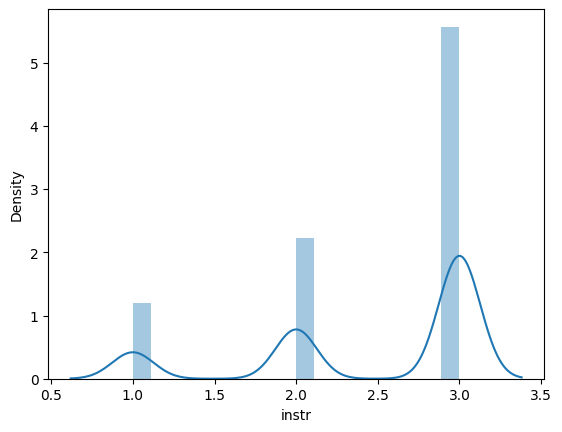

In [ ]:
sns.distplot(df['instr'])

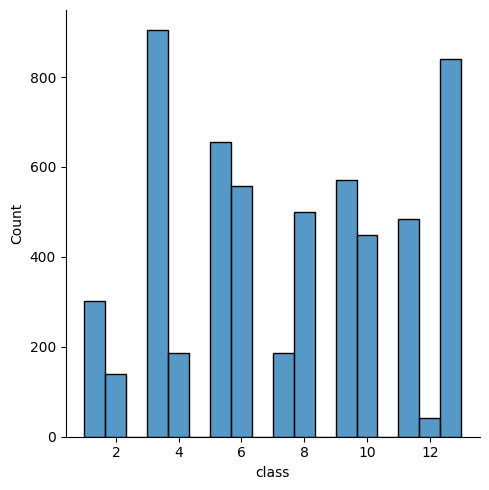

In [ ]:
sns.displot(df['class'])

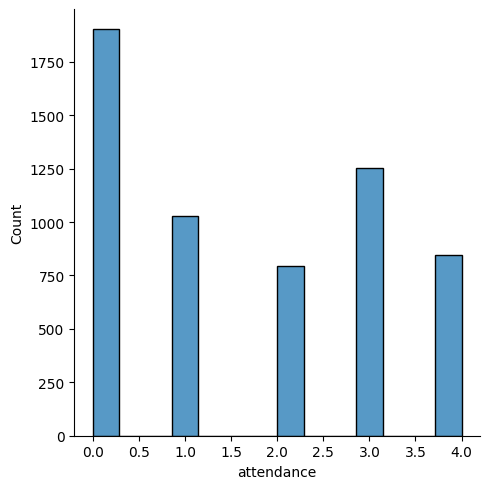

In [ ]:
sns.displot(df['attendance'])

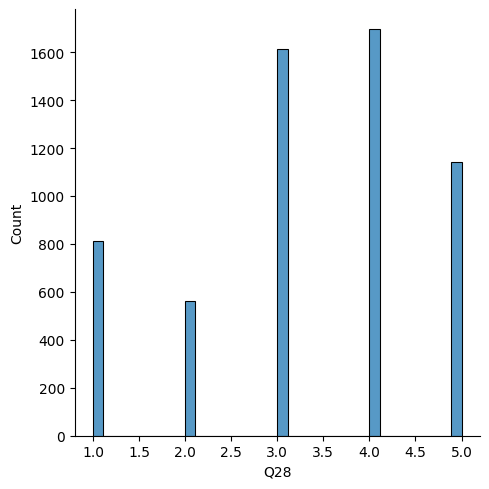

In [ ]:
sns.displot(df['Q28'])

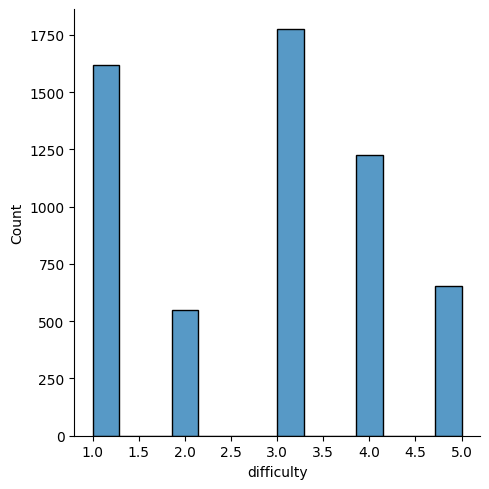

In [ ]:
sns.displot(df['difficulty'])

<Axes: >

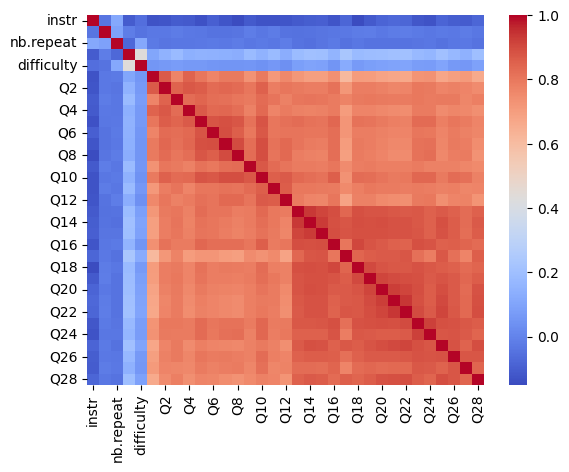

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')

In [ ]:
# cluster on 2 features
df1 = df[['Q1', 'Q28']]
df1.head()

,Q1,Q28
0,3,3
1,3,3
2,5,5
3,3,3
4,1,1


<Axes: xlabel='Q1', ylabel='Q28'>

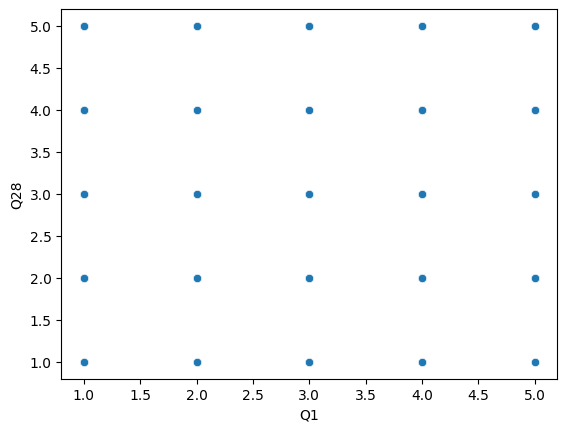

In [ ]:
sns.scatterplot(df1, x= 'Q1', y= 'Q28')

In [ ]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

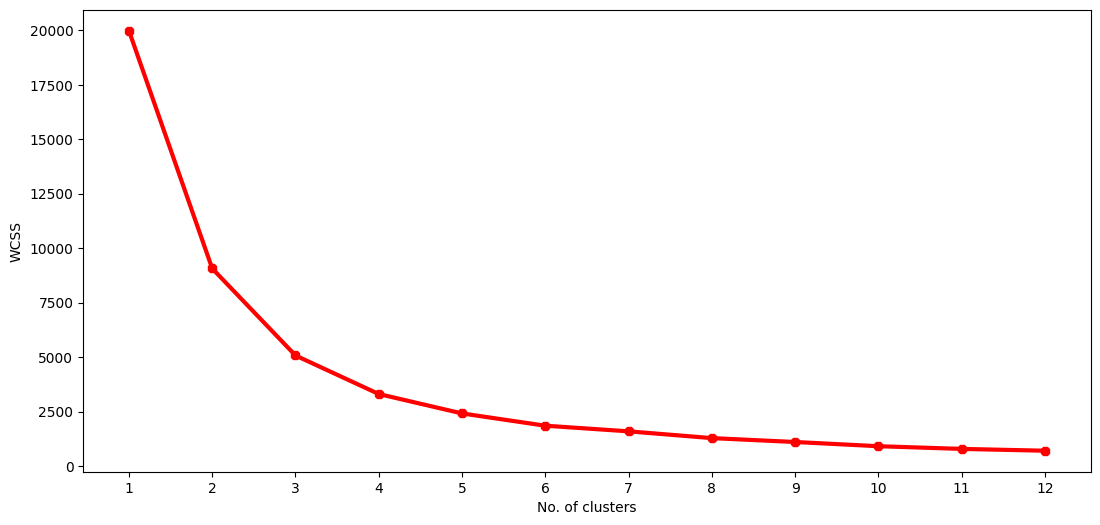

In [ ]:
# plot the results for elbow method
plt.figure(figsize=(13, 6))
plt.plot(range(1, 13), errors)
plt.plot(range(1, 13), errors, linewidth= 3, color= 'red', marker= '8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 13, 1))
plt.show()

<Axes: xlabel='Q1', ylabel='Q28'>

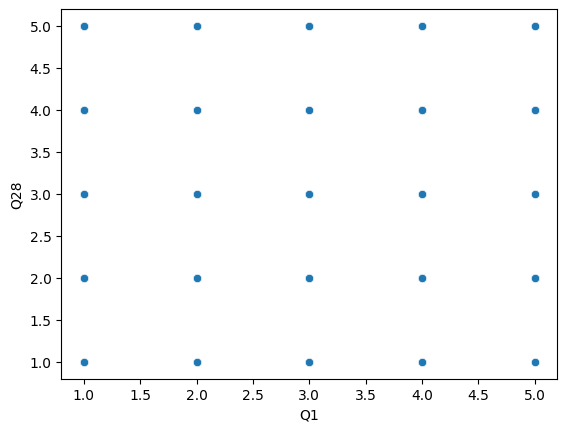

In [ ]:
sns.scatterplot(data=df1, x='Q1', y='Q28')

In [ ]:
from sklearn.cluster import KMeans

errors = []

for i in range(1, 13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    # Inertia is the sum of the squared distances of samples to their closest cluster center.
    errors.append(kmeans.inertia_)

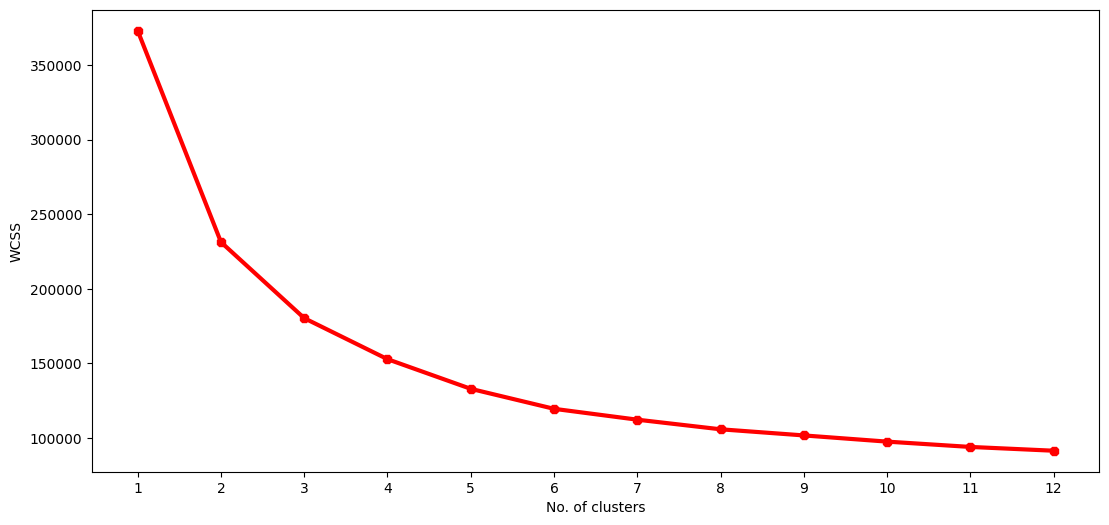

In [ ]:
# plot the results for elbow method
plt.figure(figsize=(13, 6))
plt.plot(range(1, 13), errors)
plt.plot(range(1, 13), errors, linewidth= 3, color= 'red', marker= '8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 13, 1))
plt.show()

# The point where the average distance from the centroid falls suddenly is taken as the Elbow.

**Silhouette Score Method to determine best k value**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values= []
silhouette_scores= [] 

for i in range(2, 14):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df)
    label= kmeans.predict(df)
    k_values.append(i)
    silhouette_scores.append(silhouette_score(df, label))

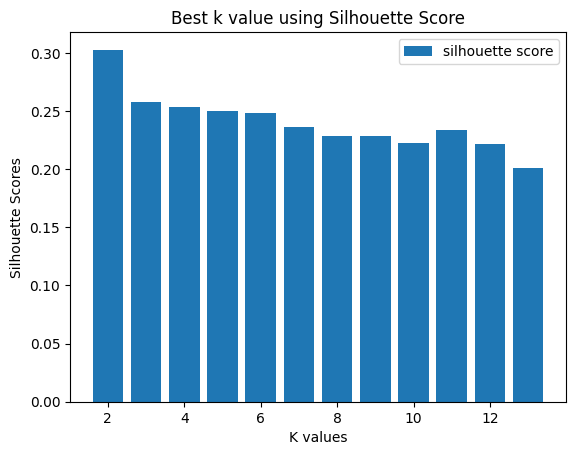

In [ ]:
plt.bar(k_values, silhouette_scores, label= 'silhouette score')
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('K values')
plt.ylabel('Silhouette Scores')
plt.title('Best k value using Silhouette Score')

plt.show()

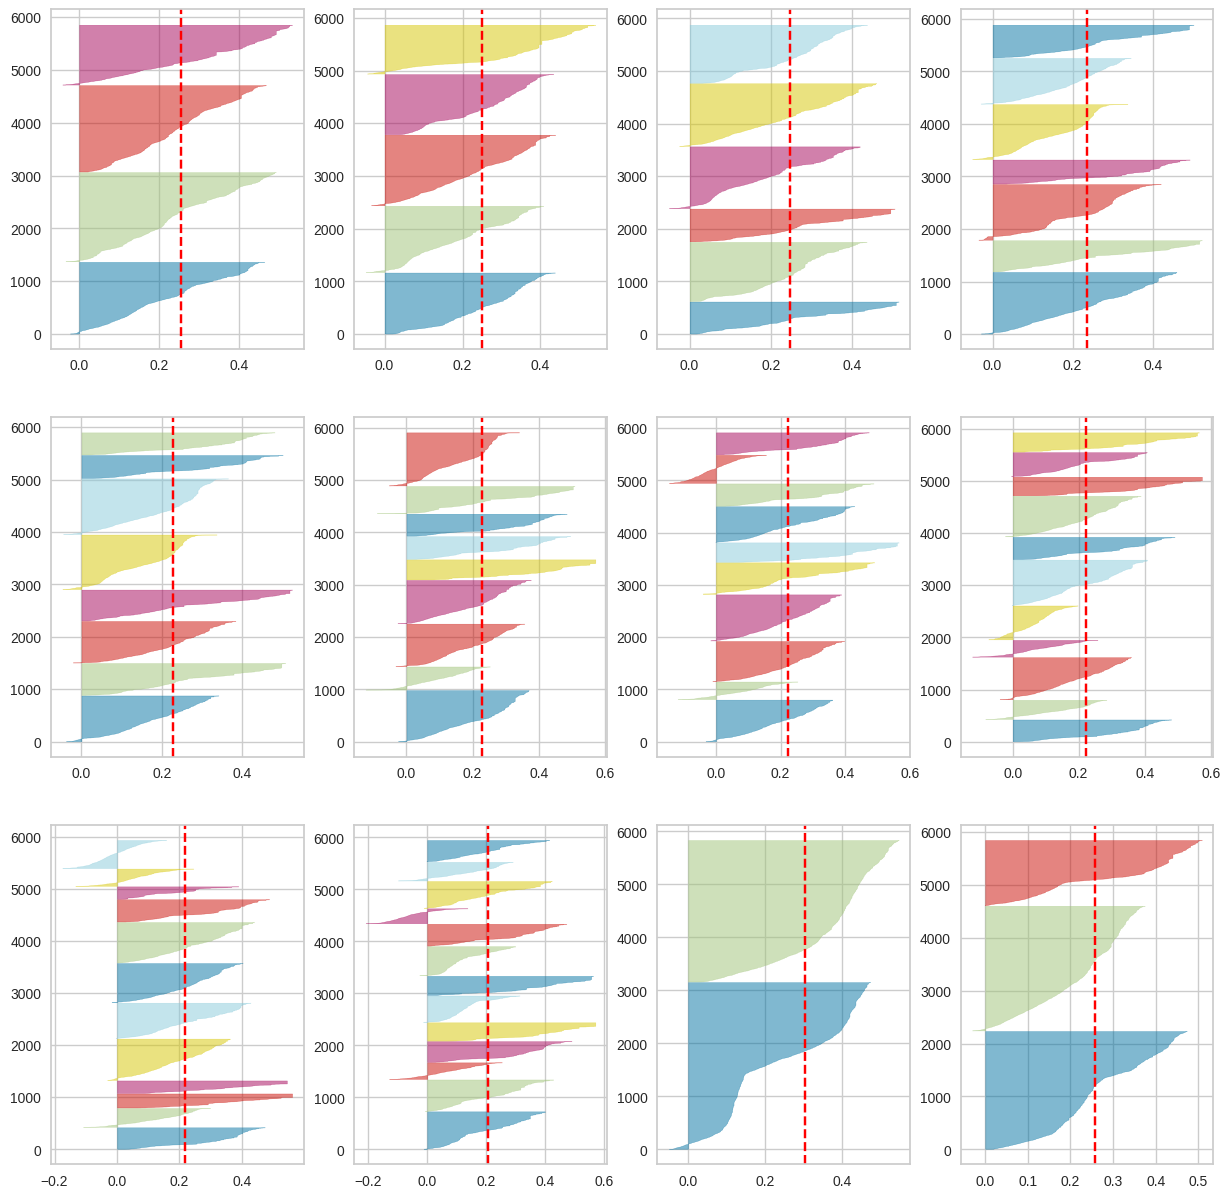

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(3, 4, figsize=(15, 15))

for k in k_values:
  q, mod = divmod(k, 4)

  model= KMeans(k)
  visualizer= SilhouetteVisualizer(model, colors='yellowbrick', ax= ax[q-1][mod])
  visualizer.fit(df)